<a href="https://colab.research.google.com/github/ahmadraza741/House-Price-Prediction/blob/main/House_price_prediction(SGDRegressor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Price Prediction with SGDRegressor**


This is the project done on california housing dataset for the prediction of the house price with the Stochastic Gradient Descent(SGD) SGDRegressor model.

We will go through some of the steps like:

1.  Loading the Dataset
2.  Data Exploration
3.  Data Preprocessing and Model exploration
4.  Model Evaluation
5.  Prediction
6.  Model performance

Using some SkLearn API like preprocessing, model_selection, compose etc. we will try to formulate our model and predict the efficiency of our model as high as possible. Also by performing Hyperparameter tuning we can increase the efficiency of our model. So lets begin...

In [ ]:
# importing SkLearn APIs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_california_housing

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate,cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

In [ ]:
# setting up the random_state value for having the same data value to be loaded.
np.random.seed(306)
plt.style.use('seaborn')

We will use ShuffleSplit as a cross validation strategy.

In [ ]:
Shuffle_split_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

##Step1: **Loading Dataset**

In [ ]:
features, label = fetch_california_housing(as_frame=True, return_X_y=True)


Splitting the dataset into training and test set.

In [ ]:
com_train_features,test_features,com_train_label,test_label = train_test_split(features,label,random_state=42)

Splitting the training dataset into training and dev set.

In [ ]:
train_features,dev_features,train_label,dev_label = train_test_split(com_train_features,com_train_label,random_state=42)

1. Fit the train set in the SGDRegressor Model with default parameter.
2. Generate the Score with this default parameter Model.
3. Hypertuning the model and calculating the score.

In [ ]:
sgd = SGDRegressor(random_state=42)
sgd.fit(train_features,train_label)

SGDRegressor(random_state=42)

In [ ]:
sgd.score(dev_features,dev_label)

-1.2521836386958275e+29

In [ ]:
train_mae = mean_absolute_error(train_label, sgd.predict(train_features))
dev_mae = mean_absolute_error(dev_label, sgd.predict(dev_features))

In [ ]:
print(f"Mean Absolute Error on Training set: {train_mae.mean()} +/- {train_mae.std()}")
print(f"Mean Absolute Error on Test set: {dev_mae.mean()} +/- {dev_mae.std()}")

Mean Absolute Error on Training set: 312995824045833.75 +/- 0.0
Mean Absolute Error on Test set: 315394681503071.94 +/- 0.0


According to the above condition, the error is very high. It may be the reason that the learning rate is very high. So now we will hypertune our model.

## Adding a feature Scaling technique

SGDRegressor is sensitive to feature scaling. So now we will use StandardScaler.

In [ ]:
sgd_pipeline = Pipeline([('feature_scaling',StandardScaler()),
                         ('sgd',SGDRegressor(random_state=42))])
sgd_pipeline.fit(train_features, train_label)
train_mse = mean_squared_error(train_label,sgd_pipeline.predict(train_features))
dev_mse = mean_squared_error(dev_label,sgd_pipeline.predict(dev_features))
print(f"Mean Squared Error on train set after Standardizing: {train_mse.mean()} +/- {train_mse.std()}")
print(f"Mean Squared Error on dev set after Standardizing: {dev_mse.mean()} +/- {dev_mse.std()}")

Mean Squared Error on train set after Standardizing: 2.30313399122981 +/- 0.0
Mean Squared Error on dev set after Standardizing: 158.05640537983615 +/- 0.0


In [ ]:
train_mae_s = mean_absolute_error(train_label,sgd_pipeline.predict(train_features))
dev_mae_s = mean_absolute_error(dev_label,sgd_pipeline.predict(dev_features))
print(f"Mean Absolute Error on train set after Standardizing: {train_mae_s.mean()} +/- {train_mae_s.std()}")
print(f"Mean Absolute Error on dev set after Standardizing: {dev_mae_s.mean()} +/- {dev_mae_s.std()}")

Mean Absolute Error on train set after Standardizing: 0.7263733471565367 +/- 0.0
Mean Absolute Error on dev set after Standardizing: 1.0129611556669136 +/- 0.0


## Step wise training of **SGDRegressor**.

In [ ]:
# keeping the eta0 as default
sgd_pipeline = Pipeline([('feature_scaling',StandardScaler()),
                         ('sgd',SGDRegressor(max_iter=50, tol=np.infty, warm_start=True, random_state=42))])
eta0 = 1e-2
sgd_pipeline.fit(train_features,train_label)
train_mse_t = mean_squared_error(train_label, sgd_pipeline.predict(train_features))
print(f"MSE after tuning some parameters of our model: {train_mse_t.mean()} +/- {train_mse_t.std()}")
print(f"Number of iterations model took to converge: {sgd_pipeline[-1].n_iter_}")

MSE after tuning some parameters of our model: 0.8767091763248471 +/- 0.0
Number of iterations model took to converge: 6


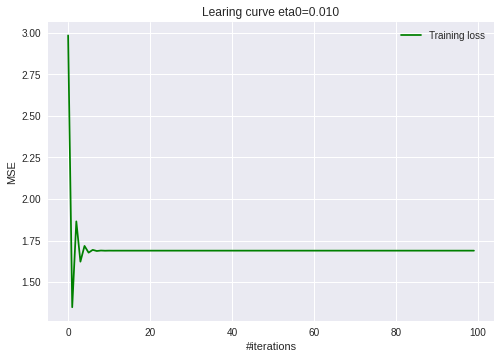

In [ ]:
sgd_pipeline = Pipeline([('feature_scaling',StandardScaler()),
                         ('sgd',SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, random_state=42))])
eta0 = 1e-2

loss=[]
for epochs in range(100):
  sgd_pipeline.fit(train_features,train_label)
  loss.append(mean_squared_error(train_label, sgd_pipeline.predict(train_features)))

plt.plot(np.arange(len(loss)), loss, "b-", color="g")
plt.xlabel("#iterations")
plt.ylabel("MSE")
plt.legend(["Training loss"],loc="best")
plt.title(f"Learing curve eta0={eta0:.3f}");

From the above graph we can conclude that the trainig loss gradually increases. So now we should lower down the learning rate by a factor of 10 and check whether the training loss would decrease or not...

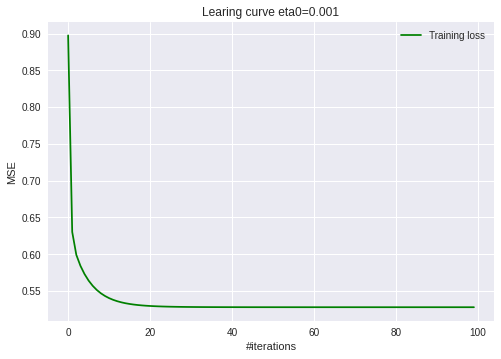

In [ ]:
eta0 = 1e-3
sgd_pipeline = Pipeline([('feature_scaling',StandardScaler()),
                         ('sgd',SGDRegressor(max_iter=1,eta0=eta0, tol=-np.infty, warm_start=True, random_state=42))])

loss=[]
for epochs in range(100):
  sgd_pipeline.fit(train_features,train_label)
  loss.append(mean_squared_error(train_label, sgd_pipeline.predict(train_features)))

plt.plot(np.arange(len(loss)), loss, "b-", color="g")
plt.xlabel("#iterations")
plt.ylabel("MSE")
plt.legend(["Training loss"],loc="best")
plt.title(f"Learing curve eta0={eta0:.3f}");

This is the ideal curve where the training loss decreased monotonically as the iteration increases.

In [ ]:
print(f"Number of iterations before convergence: {sgd_pipeline[-1].n_iter_}")
print(f"Number of weight updates: {sgd_pipeline[-1].t_}")

Number of iterations before convergence: 1
Number of weight updates: 11611.0


In [ ]:
train_mse = mean_squared_error(train_label, sgd_pipeline.predict(train_features))
dev_mse = mean_squared_error(dev_label, sgd_pipeline.predict(dev_features))
print(f"MSE on train set after tuning the model with lower learning rate: {train_mse.mean()} +/- {train_mse.std()}")
print(f"MSE on dev set after tuning the model with lower learning rate: {dev_mse.mean()} +/- {dev_mse.std()}")

MSE on train set after tuning the model with lower learning rate: 0.5279690451831024 +/- 0.0
MSE on dev set after tuning the model with lower learning rate: 0.5464577664603332 +/- 0.0


In [ ]:
train_mae = mean_absolute_error(train_label, sgd_pipeline.predict(train_features))
dev_mae = mean_absolute_error(dev_label, sgd_pipeline.predict(dev_features))
print(f"MAE on train set after tuning the model with lower learning rate: {train_mae.mean()} +/- {train_mae.std()}")
print(f"MAE on dev set after tuning the model with lower learning rate: {dev_mae.mean()} +/- {dev_mae.std()}")

MAE on train set after tuning the model with lower learning rate: 0.5333732983042573 +/- 0.0
MAE on dev set after tuning the model with lower learning rate: 0.5190150280908042 +/- 0.0


## Fixing Learning rate and fitting our model...

In [ ]:
eta0 = [1e-5,1e-4,1e-3,1e-2]
train_score, test_score = validation_curve(sgd_pipeline, 
                                           com_train_features, 
                                           com_train_label, 
                                           param_name="sgd__eta0", 
                                           param_range=eta0, 
                                           cv=Shuffle_split_cv, 
                                           scoring="neg_mean_squared_error", 
                                           n_jobs=2)
train_score, test_score

(array([[-5.4970157 , -5.47418537, -5.45561725, -5.45897979, -5.47585689,
         -5.49191576, -5.50467408, -5.46853424, -5.45976827, -5.47144762],
        [-4.30425385, -4.28546385, -4.26459393, -4.27506337, -4.28259875,
         -4.29616127, -4.31118851, -4.27922324, -4.27646987, -4.2809932 ],
        [-0.85589893, -0.85018122, -0.83657382, -0.84864292, -0.83959774,
         -0.84994956, -0.85071409, -0.84445808, -0.85800914, -0.84362491],
        [-0.66889017, -5.28976551, -0.83655736, -0.94020426, -1.54525895,
         -0.99049287, -0.55470573, -0.85670068, -7.67925582, -0.95559332]]),
 array([[ -5.34615041,  -5.43535047,  -5.50797247,  -5.49914233,
          -5.42859771,  -5.36358126,  -5.31414018,  -5.45927354,
          -5.49479733,  -5.44649995],
        [ -4.18525839,  -4.24409508,  -4.31716202,  -4.30795761,
          -4.25544917,  -4.19538734,  -4.14454028,  -4.28102197,
          -4.29459919,  -4.26337164],
        [ -0.82331265,  -0.83521866,  -0.8905568 ,  -0.85080902,
 

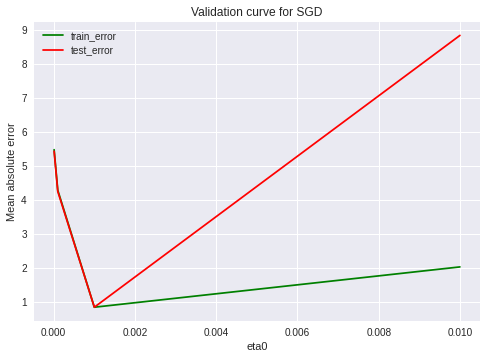

In [ ]:
train_error, test_error = -train_score, -test_score
plt.plot(eta0, train_error.mean(axis=1),"b-", color="g", label="train_error")
plt.plot(eta0, test_error.mean(axis=1), "b-", color="r", label="test_error" )
plt.xlabel("eta0")
plt.legend(loc='best')
plt.ylabel("Mean absolute error")
plt.title("Validation curve for SGD");

##SGDRegressor

In [ ]:
sgd_pipeline = Pipeline([('feature_scaling',StandardScaler()),
                         ('sgd',SGDRegressor(loss="squared_error", 
                                             max_iter=500,
                                             eta0=1e-3, 
                                             tol=1e-3, 
                                             learning_rate='constant',
                                             early_stopping=True, 
                                             validation_fraction=0.2, 
                                             n_iter_no_change=5, 
                                             average=10, 
                                             random_state=42))])
sgd_pipeline.fit(train_features, train_label)
train_mae = mean_absolute_error(train_label, sgd_pipeline.predict(train_features))
dev_mae = mean_absolute_error(dev_label, sgd_pipeline.predict(dev_features))
print(f"MAE on Train set: {train_mae.mean()} +/- {train_mae.std()}")
print(f"MAE on dev set: {dev_mae.mean()} +/- {dev_mae.std()}")

MAE on Train set: 0.5359339681114987 +/- 0.0
MAE on dev set: 0.5151099728924144 +/- 0.0


In [ ]:
print(f"Number of iteration before convergence: {sgd_pipeline[-1].n_iter_}")
print(f"Number of weight updates: {sgd_pipeline[-1].t_}")

Number of iteration before convergence: 8
Number of weight updates: 92881.0


In [ ]:
sgd_pipeline = Pipeline([('feature_scaling',StandardScaler()),
                         ('sgd',SGDRegressor(loss="squared_error", 
                                             max_iter=500,
                                             eta0=1e-3, 
                                             tol=1e-3, 
                                             learning_rate='adaptive',
                                             early_stopping=True, 
                                             validation_fraction=0.2, 
                                             n_iter_no_change=5, 
                                             average=10, 
                                             random_state=42))])
sgd_pipeline.fit(train_features, train_label)
train_mae = mean_absolute_error(train_label, sgd_pipeline.predict(train_features))
dev_mae = mean_absolute_error(dev_label, sgd_pipeline.predict(dev_features))
print(f"MAE on Train set: {train_mae.mean()} +/- {train_mae.std()}")
print(f"MAE on dev set: {dev_mae.mean()} +/- {dev_mae.std()}")

MAE on Train set: 0.5340193046836148 +/- 0.0
MAE on dev set: 0.5198356196858102 +/- 0.0


In [ ]:
print(f"Number of iteration before convergence: {sgd_pipeline[-1].n_iter_}")
print(f"Number of weight updates: {sgd_pipeline[-1].t_}")

Number of iteration before convergence: 33
Number of weight updates: 383131.0


### Setting max_iter

In [ ]:
max_iter = np.ceil(1e6/com_train_features.shape[0])
max_iter

65.0

In [ ]:
sgd_pipeline = Pipeline([('feature_scaling',StandardScaler()),
                         ('sgd',SGDRegressor(loss="squared_error", 
                                             max_iter=max_iter,
                                             eta0=1e-3, 
                                             tol=1e-3, 
                                             learning_rate='constant',
                                             early_stopping=True, 
                                             validation_fraction=0.2, 
                                             n_iter_no_change=5, 
                                             average=10, 
                                             random_state=42))])
sgd_pipeline.fit(train_features, train_label)
train_mae = mean_absolute_error(train_label, sgd_pipeline.predict(train_features))
dev_mae = mean_absolute_error(dev_label, sgd_pipeline.predict(dev_features))
print(f"MAE on Train set: {train_mae.mean()} +/- {train_mae.std()}")
print(f"MAE on dev set: {dev_mae.mean()} +/- {dev_mae.std()}")

MAE on Train set: 0.5359339681114987 +/- 0.0
MAE on dev set: 0.5151099728924144 +/- 0.0


In [ ]:
print(f"Number of iterations before convergence: {sgd_pipeline[-1].n_iter_}")
print(f"Number of weight updates: {sgd_pipeline[-1].t_}")

Number of iterations before convergence: 8
Number of weight updates: 92881.0
